In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('winequality-red.csv',sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#So by taking a look at the above data frame  we can see that the column 'quality' is the target label making the remaining columns as the features that we can customize and use to predict our label. This classifies to be a Classification problem!

In [13]:
df.shape

(1599, 12)

In [14]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As per my observation:

1.There is a big gap between 75% and max values of residual sugar column

2.There is a big gap between 75% and max values of free sulfur dioxide column

3.There is a huge gap between 75% and max value of total sulfur dioxide column

All these gaps indicate that there are outliers present in our dataset.

# Visualization

In [17]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

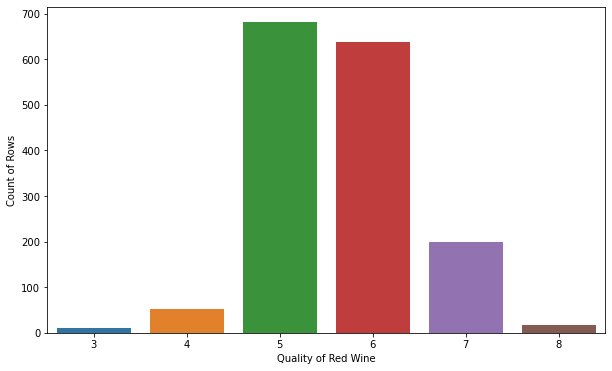

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows')
plt.show()

In [19]:
#Lets visualise label vs feature using bar plot

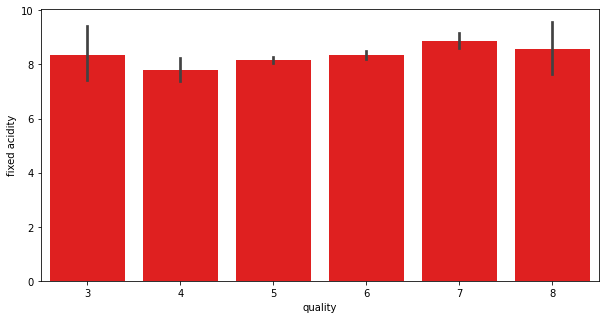

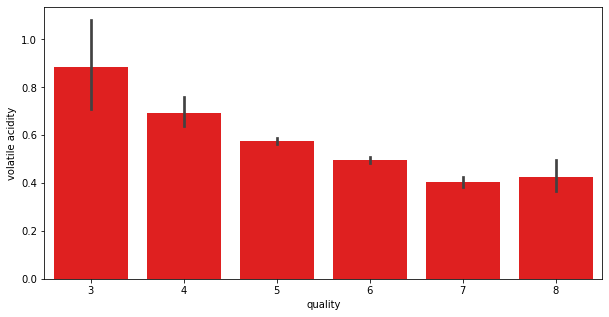

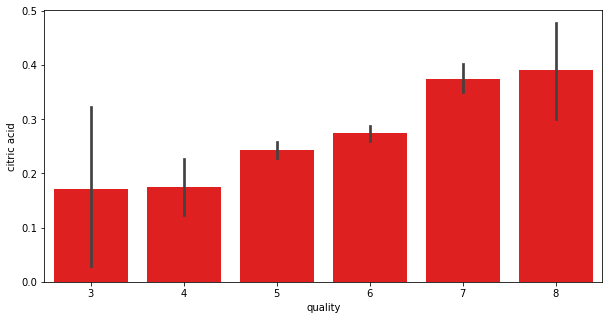

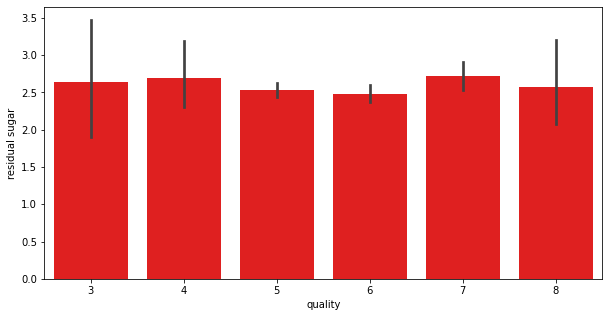

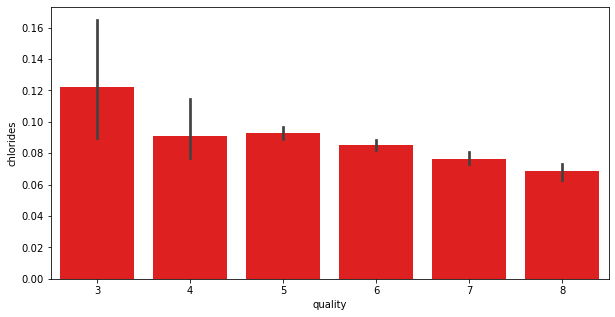

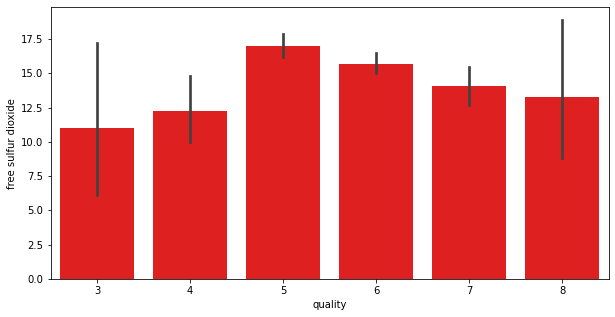

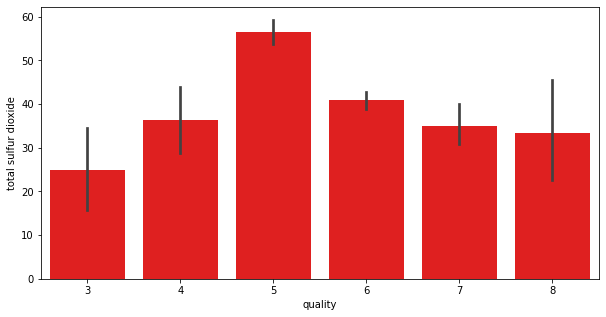

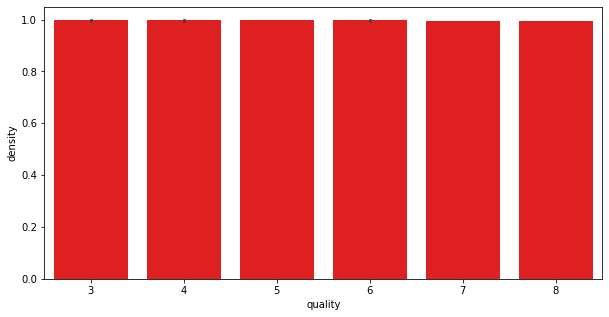

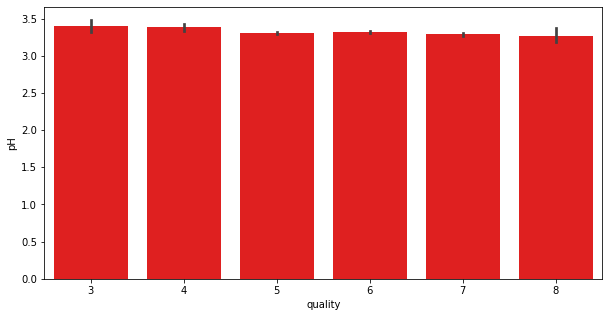

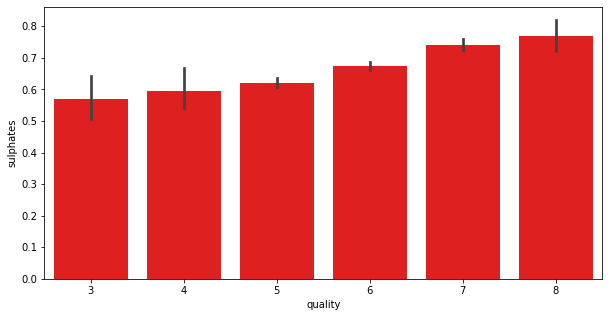

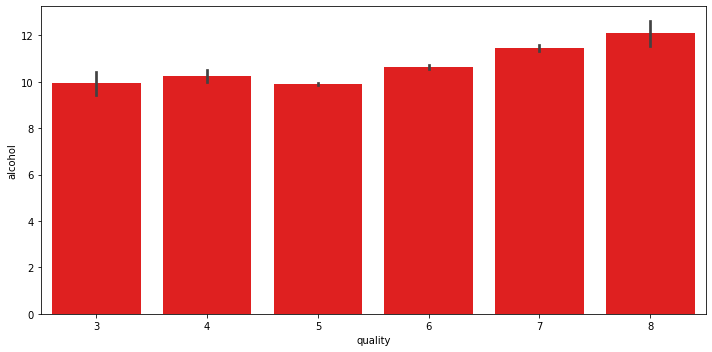

In [20]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="red")
plt.tight_layout()
plt.show()

here we can conclude that to get better quality wine citric acid, sulphates and alcohol columns play a major role as they increase quality also increases

In [26]:
df_features = df.drop('quality', axis=1)

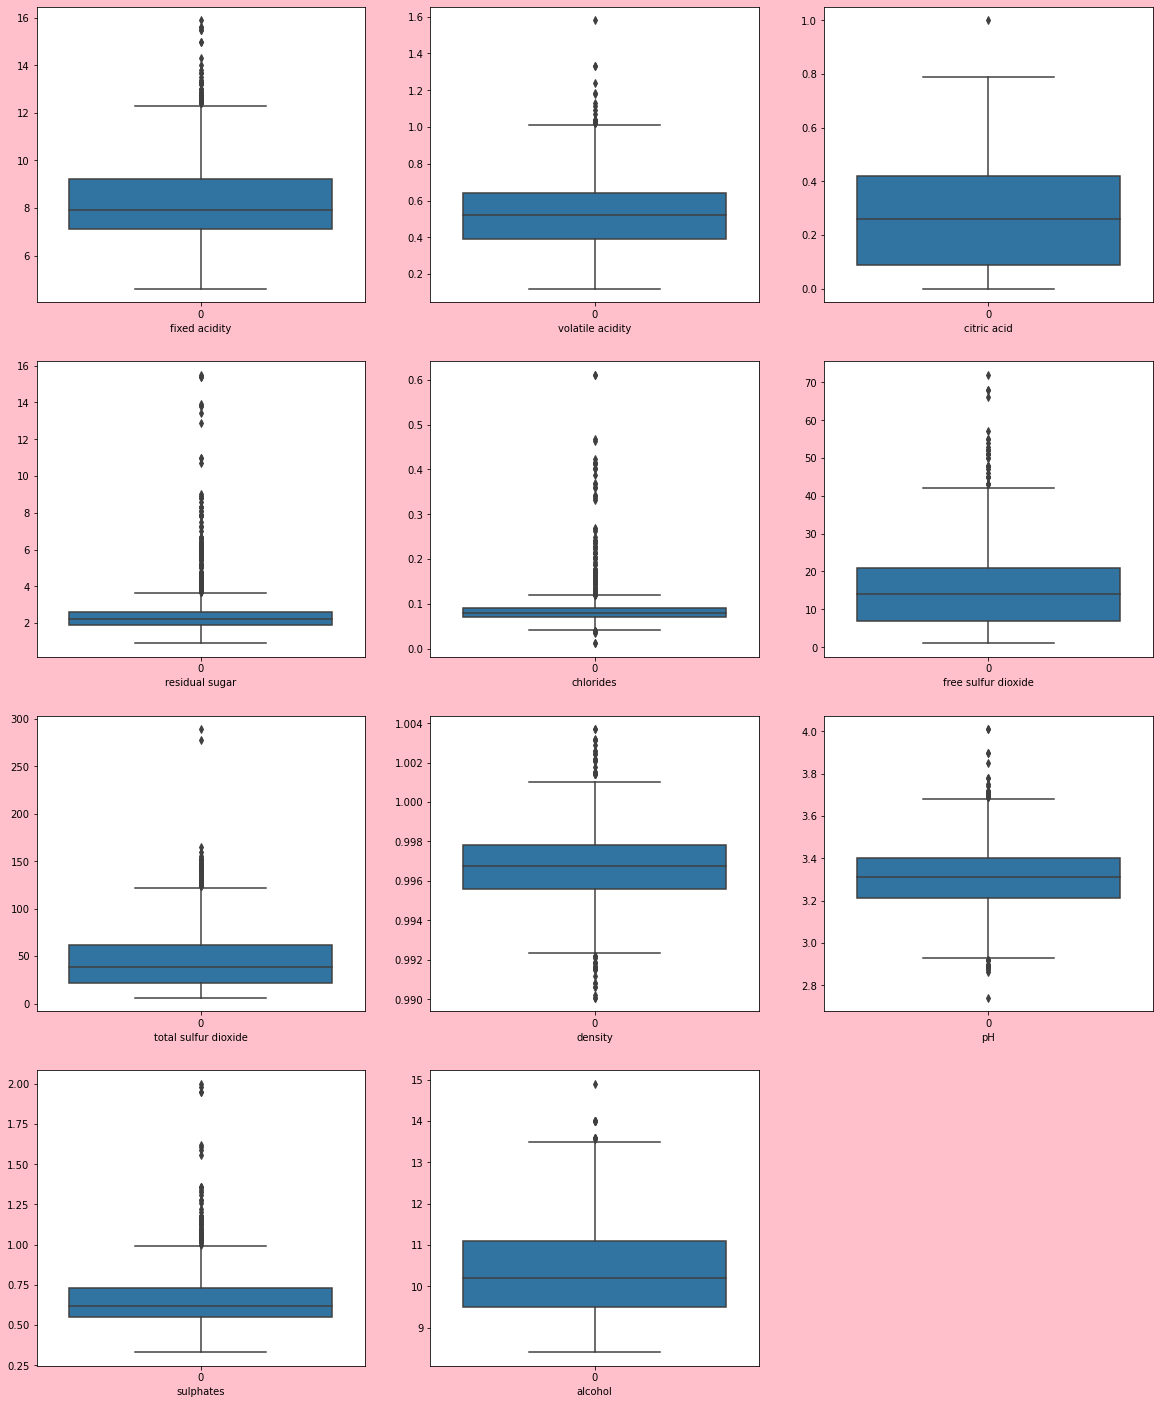

In [37]:
plt.figure(figsize=(20,25),facecolor = 'pink')
graph = 1

for column in df_features:
    if graph<=13:
        ax = plt.subplot(4,3,graph)
        sns.boxplot(data = df_features[column])
        plt.xlabel(column)
    
    graph+=1
plt.show() 

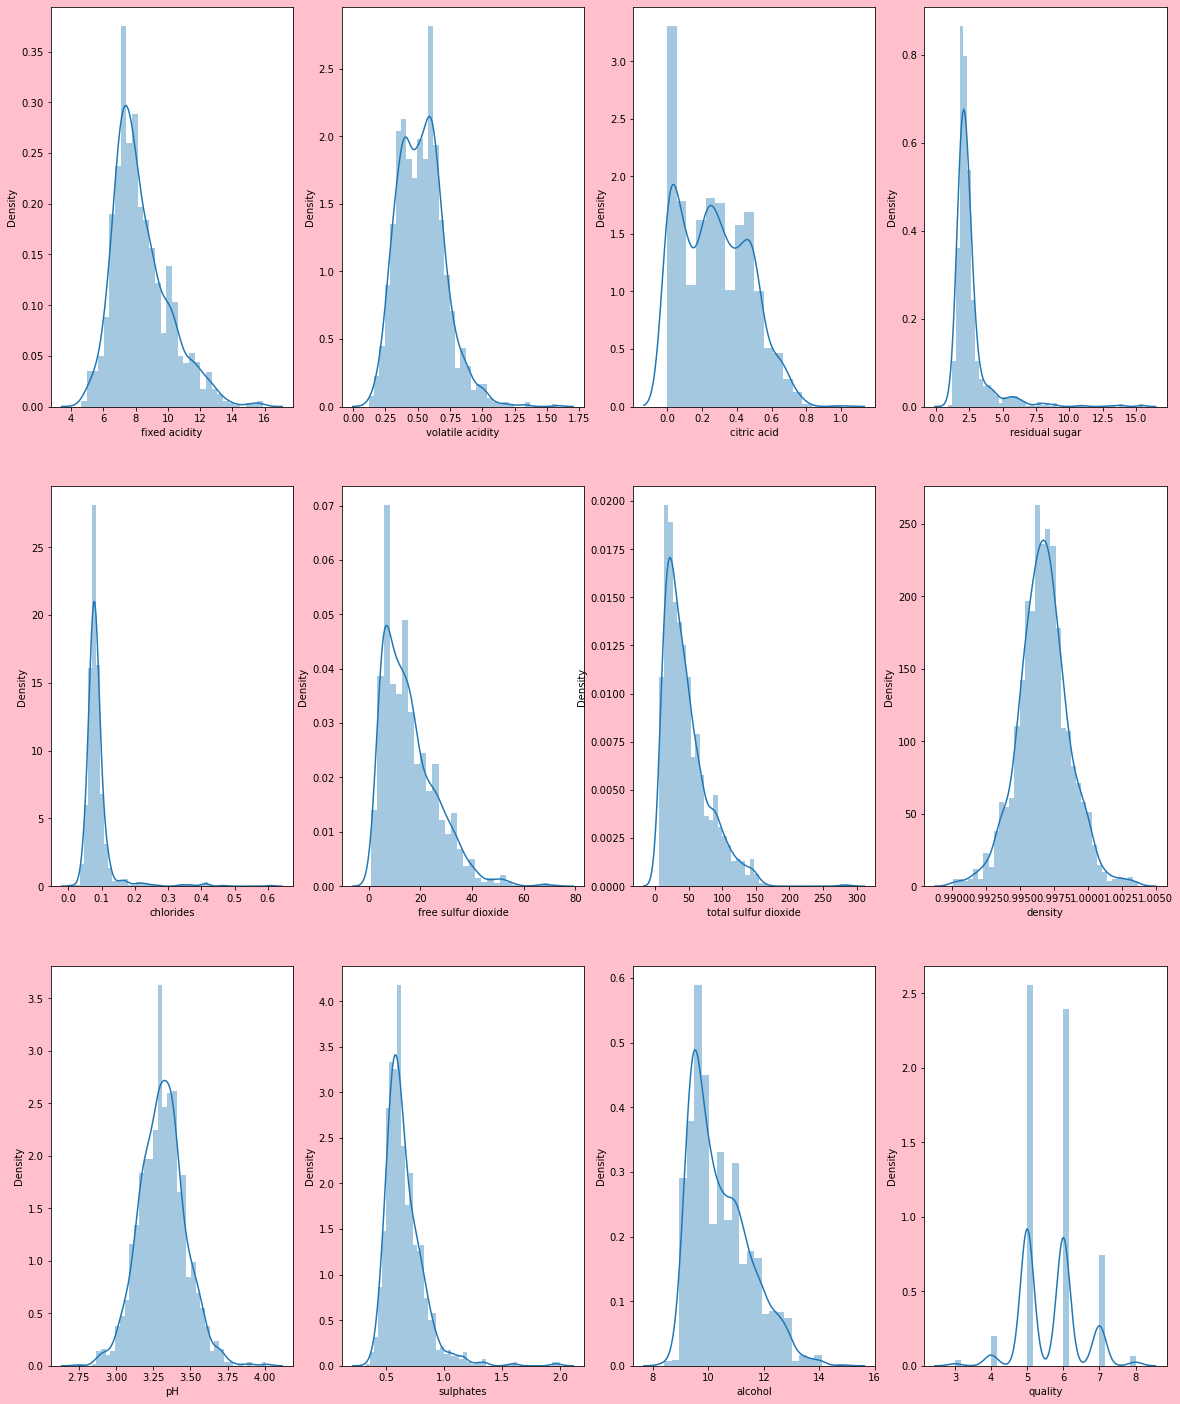

In [39]:
plt.figure(figsize=(20,25),facecolor = 'pink')
plotnumber = 1

for column in df:
    if plotnumber<=13:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    
    plotnumber+=1 
plt.show() 

The distribution plots show that few of the columns are in normal distribution category showing a proper bell shape curve. However, we do see skewness in most of the feature columns like citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol columns. We are going to ignore the label column since it is a categorical column and will need to fix the imbalance data inside it.

# Correlation using a Heatmap

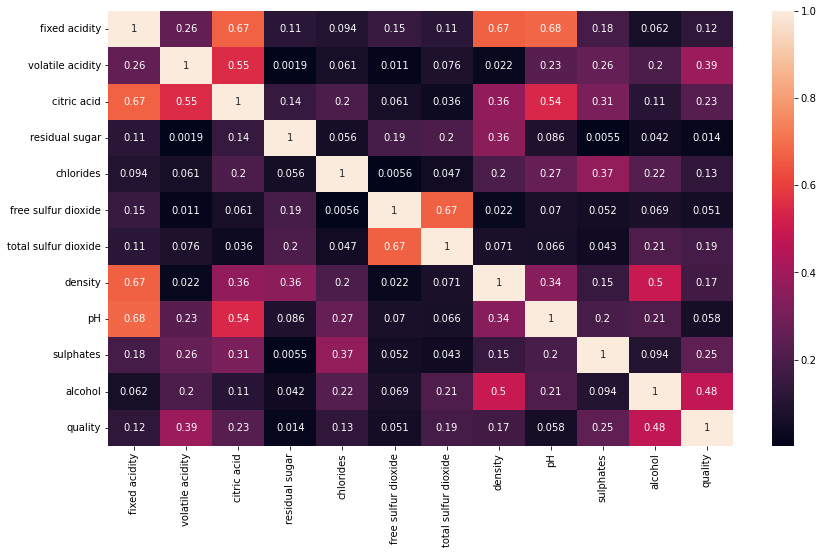

In [41]:
df_corr = df.corr().abs()

plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot= True)
plt.show()

In [66]:
# lets remove otlier

In [67]:
from scipy.stats import zscore

In [68]:
# Z score method

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


I have used the Z score method to get rid of outliers present in our dataset

In [69]:
# Percentage of Data Loss

data_loss=(1599-1451)/1599*100 
# 1599 (number of rows in the original dataframe) and 1451 (number of rows after outlier removal)
data_loss

9.255784865540964

In [70]:
X = df.drop('quality', axis=1)
Y = df['quality']

In [72]:
Y.value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

surely our label column is imbalance we have to balance it

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
SM = SMOTE()
X, Y = SM.fit_resample(X, Y)

In [75]:
Y.value_counts()

5    617
6    617
7    617
4    617
8    617
Name: quality, dtype: int64

In [76]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
3080    8
3081    8
3082    8
3083    8
3084    8
Name: quality, Length: 3085, dtype: int64

In [77]:
#LABEL BINARISATION

In [78]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0)

In [79]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3080    1
3081    1
3082    1
3083    1
3084    1
Name: quality, Length: 3085, dtype: int64

In [80]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
3080,9.934579,0.320561,0.547664,2.717757,0.075888,5.588785,16.588785,0.996729,3.150000,0.808972,11.412150
3081,9.602082,0.386597,0.456805,2.181746,0.068954,5.522818,13.908728,0.996133,3.254564,0.670913,11.365973
3082,8.713387,0.413330,0.394002,2.106813,0.068333,5.933302,12.066698,0.995323,3.341996,0.698671,11.760029
3083,8.222830,0.498302,0.342088,1.698049,0.067652,29.882930,79.654633,0.993658,3.214263,0.706741,12.244293


In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Creating the training and testing data sets

In [85]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [86]:
#LET FIRST FIND THE BEST RANDOM STATE TO GET BEST ACCUARACY

In [88]:

maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is",maxAccu,"at random_state",maxRS)

Best accuracy is 0.9622030237580994 at random_state 198


In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=198)

In [106]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# RandomForestClassifier

In [110]:
# checking accuracy for RandomForestclasifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))
score = cross_val_score(RFC,X,Y)
print('cross vallidation sccore is - ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation mean score is - ",accuracy_score(y_test,predRFC)-score.mean())

Acurracy score is-  0.9341252699784017
[[511  38]
 [ 23 354]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       549
           1       0.90      0.94      0.92       377

    accuracy                           0.93       926
   macro avg       0.93      0.93      0.93       926
weighted avg       0.93      0.93      0.93       926

cross vallidation sccore is -  [0.89627229 0.9076175  0.87358185 0.97893031 0.99189627]
CV mean score is -  0.9296596434359806
Difference between Accracy score and cross validation mean score is -  0.004465626542421108


# Support Vector Machine Classifier

In [117]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
score = cross_val_score(svc,X,Y)
print('cross validation score is- ',score)
print('cv mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predsvc)-score.mean())

Acurracy score is-  0.9071274298056156
[[507  42]
 [ 44 333]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       549
           1       0.89      0.88      0.89       377

    accuracy                           0.91       926
   macro avg       0.90      0.90      0.90       926
weighted avg       0.91      0.91      0.91       926

cross validation score is-  [0.86061588 0.88168558 0.84440843 0.97244733 0.98541329]
cv mean score is -  0.9089141004862237
Difference between Accracy score and cross validation score is -  -0.0017866706806081156


# Gradient Boosting Classifier

In [118]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))
score = cross_val_score(GB,X,Y)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predGB)-score.mean())

Acurracy score is-  0.9038876889848813
[[502  47]
 [ 42 335]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       549
           1       0.88      0.89      0.88       377

    accuracy                           0.90       926
   macro avg       0.90      0.90      0.90       926
weighted avg       0.90      0.90      0.90       926

cross validation score is-  [0.85089141 0.87682334 0.82171799 0.96596434 0.98379254]
CV mean score is -  0.899837925445705
Difference between Accracy score and cross validation score is -  0.004049763539176299


# AdaBoost Classifier

In [119]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

score = cross_val_score(ABC,X,Y)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predABC)-score.mean())

Acurracy score is-  0.8736501079913607
[[486  63]
 [ 54 323]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       549
           1       0.84      0.86      0.85       377

    accuracy                           0.87       926
   macro avg       0.87      0.87      0.87       926
weighted avg       0.87      0.87      0.87       926

cross validation score is-  [0.8006483  0.82658023 0.80875203 0.94003241 0.9643436 ]
CV mean score is -  0.8680713128038897
Difference between Accracy score and cross validation score is -  0.005578795187470953


# BaggingClassifier

In [120]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

score = cross_val_score(BC,X,Y)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predBC)-score.mean())

Acurracy score is-  0.9233261339092873
[[515  34]
 [ 37 340]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       549
           1       0.91      0.90      0.91       377

    accuracy                           0.92       926
   macro avg       0.92      0.92      0.92       926
weighted avg       0.92      0.92      0.92       926

cross validation score is-  [0.86223663 0.86871961 0.86871961 0.97893031 0.99027553]
CV mean score is -  0.9137763371150729
Difference between Accracy score and cross validation score is -  0.009549796794214416


# Extra TreeClassifier

In [121]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

score = cross_val_score(ET,X,Y)
print('cross validation score is- ',score)
print('cv mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predET)-score.mean())

Acurracy score is-  0.9416846652267818
[[517  32]
 [ 22 355]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       549
           1       0.92      0.94      0.93       377

    accuracy                           0.94       926
   macro avg       0.94      0.94      0.94       926
weighted avg       0.94      0.94      0.94       926

cross validation score is-  [0.91734198 0.93192869 0.87844408 0.98379254 0.99513776]
cv mean score is -  0.9413290113452188
Difference between Accracy score and cross validation score is -  0.0003556538815630006


# DecisionTreeClassifier

In [122]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT = DT.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

score = cross_val_score(DT,X,Y)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predDT)-score.mean())

Acurracy score is-  0.9211663066954644
[[506  43]
 [ 30 347]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       549
           1       0.89      0.92      0.90       377

    accuracy                           0.92       926
   macro avg       0.92      0.92      0.92       926
weighted avg       0.92      0.92      0.92       926

cross validation score is-  [0.84927066 0.84602917 0.81685575 0.92544571 0.97730956]
CV mean score is -  0.8829821717990276
Difference between Accracy score and cross validation score is -  0.038184134896436794


# KNeighborsClassifier

In [123]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN = KNN.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

score = cross_val_score(KNN,X,Y)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predKNN)-score.mean())

Acurracy score is-  0.8995680345572354
[[486  63]
 [ 30 347]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       549
           1       0.85      0.92      0.88       377

    accuracy                           0.90       926
   macro avg       0.89      0.90      0.90       926
weighted avg       0.90      0.90      0.90       926

cross validation score is-  [0.84927066 0.86547812 0.8006483  0.95461912 0.98379254]
CV mean score is -  0.8907617504051863
Difference between Accracy score and cross validation score is -  0.008806284152049093


# Hyper parameter tuning on the best ML Model

In [138]:
#CHOSSING extra tree classifier as best model
grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth' : range(10,25),
    'min_samples_leaf' : range(2,6),
    'min_samples_split' : range(3,8),
    'max_leaf_nodes' : range(5,10)
}

In [139]:
grid_search = GridSearchCV(estimator = ET, param_grid= grid_param, n_jobs = -1)

In [ ]:
grid_search.fit(x_train,y_train)

In [127]:
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 20,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [131]:
FINAL_MODEL = ExtraTreesClassifier(criterion='gini', max_depth=20, max_leaf_nodes= 9,min_samples_leaf= 3,min_samples_split=4)
FINAL_MODEL.fit(x_train,y_train)

ExtraTreesClassifier(max_depth=20, max_leaf_nodes=9, min_samples_leaf=3,
                     min_samples_split=4)

In [134]:
finalmod_pred = FINAL_MODEL.predict(x_test)
finalmod_acc = (accuracy_score(y_test, finalmod_pred))*100
print("Accuracy score for the Best Model is:", finalmod_acc)

Accuracy score for the Best Model is: 87.14902807775377


In [141]:
from sklearn import metrics

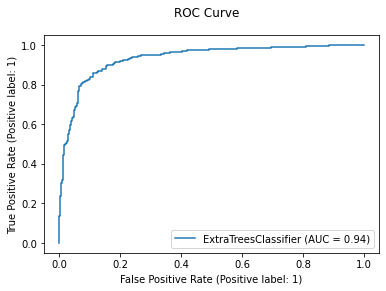

In [143]:
disp = metrics.plot_roc_curve(FINAL_MODEL,x_test,y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

I have generated the ROC Curve for my final model and it shows the AUC score for my final model to be of 94%

In [144]:
import joblib


In [146]:
import pickle
filename = 'RED_WINE.pkl'
pickle.dump(FINAL_MODEL,open(filename,'wb'))#saved model

In [152]:
import pickle
loaded_model=pickle.load(open('RED_WINE.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

87.14902807775377
